In [67]:
#initiate imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime,timezone
import json
import math
from IPython import display

In [172]:
#doesn't work yet but want to be abl to pause. bot
from tkinter    
    
window = Tk()    
    
def mouseClick( event ):    
 print( "mouse clicked" )    
    
label = Label( window, text="Click me" )    
label.pack()    
    
label.bind( "<Button>", mouseClick )    
    
window.mainloop()  

SyntaxError: invalid syntax (<ipython-input-172-8ba2ca3af7d7>, line 1)

In [53]:
#api for nomics https://api.nomics.com/
apk="m_9386cac54693578a1cbfb3729a22c0c080769888"

In [525]:
#add one second to time for next request so that I can aggregate charts
def updatetime ():

    new_hour=0
    new_minute=0
    new_second=0


    if (last_second<59):
        new_second=last_second+1
        new_hour=last_hour
        new_minute=last_minute
    else:#second flips to 00
        new_second=0
        if (last_minute<59):
            new_minute=last_minute+1 
            new_hour=last_hour
        else:#minute flips to 00
            new_minute=0
            if (last_hour<23):
                new_hour=last_hour+1 
            else:
                new_hour=0

    #converts back to string ex: '09' 
    if (new_second<10):
         new_second='0'+str(new_second)
    else:
        str(new_second)

    if (new_minute<10):
         new_minute='0'+str(new_minute)
    else:
        str(new_minute)

    if (new_hour<10):
         new_hour='0'+str(new_hour)
    else:
        str(new_hour)
        
    
    return f'T{new_hour}%3A{new_minute}%3A{new_second}Z'

In [587]:
#exchange history
def new_request():
    url = f'https://api.nomics.com/v1/trades?key={apk}&exchange=binance&market={crypto}USDT&limit={my_limit}&order=asc&from={start_date}{start_time}'
    return requests.get(url).json()

In [1055]:
#build data frame for expressed time and crypto
#UCT time is 8 hours ahead, so this would be 02:00:00am PST
request_num=2

crypto='MASK'
start_time='T04%3A00%3A00Z'
start_date='2021-12-09'
end_day=9 #utc day (for now only works if in the same month!!)
end_hour=16 #utc
my_limit=2500
my_df_lenght=my_limit

#the initial request
df=pd.DataFrame(new_request())
print(f'request: {1}')


#loop while conditions are true
my_conditions=True
my_limit=len(df)


while my_conditions:
    last_time=df.iloc[-1:].timestamp
    last_hour=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[0])
    last_minute=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[1])
    last_second=int(last_time.str.split('T')[my_df_lenght-1][1].split(':')[2].split('.')[0])
    last_day=int(df.iloc[-1:].timestamp[my_df_lenght-1].split('T')[0].split('-')[2])
    start_time=updatetime()
    
    if (last_day<=end_day):
        my_conditions=True
        if (last_hour<end_hour):
            my_conditions=True
            print('true')
        else:
            my_conditions=False
            print("TFALSEEEEE")         
    else:
        my_conditions=False
        print("FALSEEEEE")
            
    if (my_conditions):
        new_df=pd.DataFrame(new_request())
        df=pd.concat([df, new_df])
        df.reset_index(inplace=True)
        del df['index']
        my_df_lenght=len(df)
        print(f'request: {request_num} and new df lenght is {my_df_lenght}')
        request_num=request_num+1
        
df
  

request: 1
true
request: 2 and new df lenght is 5000
true
request: 3 and new df lenght is 7500
true
request: 4 and new df lenght is 10000
true
request: 5 and new df lenght is 12500
true
request: 6 and new df lenght is 15000
true
request: 7 and new df lenght is 17500
true
request: 8 and new df lenght is 20000
true
request: 9 and new df lenght is 22500
true
request: 10 and new df lenght is 25000
true
request: 11 and new df lenght is 27500
true
request: 12 and new df lenght is 30000
true
request: 13 and new df lenght is 32500
true
request: 14 and new df lenght is 35000
true
request: 15 and new df lenght is 37500
true
request: 16 and new df lenght is 40000
true
request: 17 and new df lenght is 42500
true
request: 18 and new df lenght is 45000
true
request: 19 and new df lenght is 47500
true
request: 20 and new df lenght is 50000
true
request: 21 and new df lenght is 52500
true
request: 22 and new df lenght is 55000
true
request: 23 and new df lenght is 57500
true
request: 24 and new df len

,id,timestamp,price,volume
0,12430627,2021-12-09T04:00:00.567Z,13.92300000,2.80000000
1,12430628,2021-12-09T04:00:00.567Z,13.92100000,14.00000000
2,12430629,2021-12-09T04:00:00.575Z,13.92000000,4.30000000
3,12430630,2021-12-09T04:00:00.575Z,13.91800000,9.70000000
4,12430631,2021-12-09T04:00:00.604Z,13.91800000,10.70000000
...,...,...,...,...
64995,12495946,2021-12-09T16:17:41.446Z,12.90500000,63.00000000
64996,12495947,2021-12-09T16:17:41.447Z,12.90500000,47.50000000
64997,12495948,2021-12-09T16:17:41.458Z,12.90100000,27.20000000
64998,12495949,2021-12-09T16:17:41.486Z,12.88900000,11.60000000


In [633]:
#see built df
#df.timestamp=pd.to_datetime(df['timestamp'])
df

,id,timestamp,price,volume
0,5492358,2021-12-06T04:04:00.372Z,0.84000000,272.00000000
1,5492359,2021-12-06T04:04:00.372Z,0.83780000,70.00000000
2,5492360,2021-12-06T04:04:00.372Z,0.83770000,36.00000000
3,5492361,2021-12-06T04:04:00.398Z,0.84170000,3.00000000
4,5492362,2021-12-06T04:04:02.153Z,0.84130000,44.00000000
...,...,...,...,...
22495,5514926,2021-12-06T22:10:54.308Z,0.88560000,56.00000000
22496,5514927,2021-12-06T22:11:09.086Z,0.88590000,133.00000000
22497,5514928,2021-12-06T22:11:09.095Z,0.88590000,1082.00000000
22498,5514929,2021-12-06T22:11:24.052Z,0.88610000,112.00000000


In [1056]:
#change price to a float
df['price']=df['price'].astype(float)

In [1057]:
df.reset_index(inplace=True)

In [636]:
#converts UTC time zone to Pacific and then to string for chart
#for index, row in df.iterrows():
#    utc_dt =pd.to_datetime(row.timestamp)
#    pst_tz = timezone('US/Pacific')
#    pst_dt = pst_tz.normalize(utc_dt.astimezone(pst_tz))
#    df.timestamp[index]=pd.to_datetime(pst_dt)

#df.timestamp=df.timestamp.astype(str)
#df

,Unnamed: 0,index,id,timestamp,price,volume
0,0,0,12430627,2021-12-09T04:00:00.567Z,13.923,2.8
1,1,1,12430628,2021-12-09T04:00:00.567Z,13.921,14.0
2,2,2,12430629,2021-12-09T04:00:00.575Z,13.920,4.3
3,3,3,12430630,2021-12-09T04:00:00.575Z,13.918,9.7
4,4,4,12430631,2021-12-09T04:00:00.604Z,13.918,10.7
...,...,...,...,...,...,...
64995,64995,64995,12495946,2021-12-09T16:17:41.446Z,12.905,63.0
64996,64996,64996,12495947,2021-12-09T16:17:41.447Z,12.905,47.5
64997,64997,64997,12495948,2021-12-09T16:17:41.458Z,12.901,27.2
64998,64998,64998,12495949,2021-12-09T16:17:41.486Z,12.889,11.6


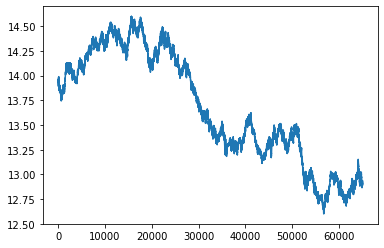

In [315]:
#plot #I lost on this one as it never got high enough -  I bought in at 14.1 and manually sold at 12.7 ish
df=pd.read_csv('dec_8_9_spike_MASK.csv')
plt.plot(df.price.astype(float))
df

1.671801808991954e-05


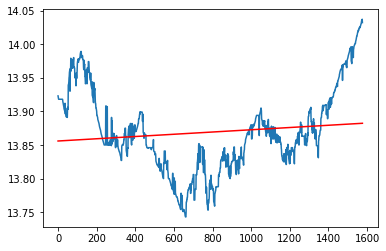

In [320]:
temp_df=df.iloc[(df.index>=0) & (df.index<=1576)]
plt.plot(temp_df.price)

x = temp_df.index
y = temp_df.price
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regress_values=x*slope+intercept
plt.plot(x,regress_values,'-r')
print(slope)

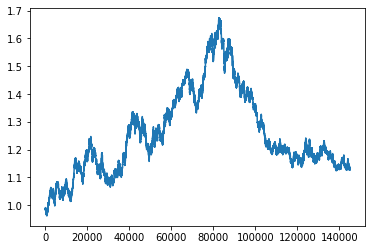

In [658]:
#plot
plt.plot(df.price)
plt.savefig('dec2kmd_spike.png')

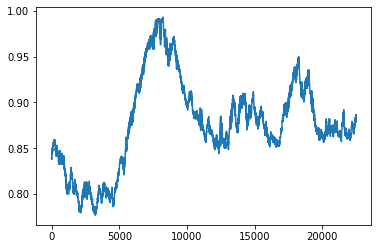

In [650]:
#plot
plt.plot(df.price)
plt.savefig('dec6kmd_spike.png')

In [638]:
#save the csv
#df.to_csv('dec_6_spike_kmd.csv')

In [173]:
df=pd.read_csv('dec_6_spike_kmd.csv')
df.

,Unnamed: 0,index,id,timestamp,price,volume
0,0,0,5492358,2021-12-06T04:04:00.372Z,0.8400,272.0
1,1,1,5492359,2021-12-06T04:04:00.372Z,0.8378,70.0
2,2,2,5492360,2021-12-06T04:04:00.372Z,0.8377,36.0
3,3,3,5492361,2021-12-06T04:04:00.398Z,0.8417,3.0
4,4,4,5492362,2021-12-06T04:04:02.153Z,0.8413,44.0


In [181]:
#kmd6_snapshot_df=df.iloc[df.index<10000]
#kmd6_snapshot_df.to_csv('snapshot_dec_6_spike_kmd.csv')

,Unnamed: 0,Unnamed: 0.1,index,id,timestamp,price,volume
0,0,0,0,5492358,2021-12-06 04:04:00.372000+00:00,0.8400,272.0
1,1,1,1,5492359,2021-12-06 04:04:00.372000+00:00,0.8378,70.0
2,2,2,2,5492360,2021-12-06 04:04:00.372000+00:00,0.8377,36.0
3,3,3,3,5492361,2021-12-06 04:04:00.398000+00:00,0.8417,3.0
4,4,4,4,5492362,2021-12-06 04:04:02.153000+00:00,0.8413,44.0


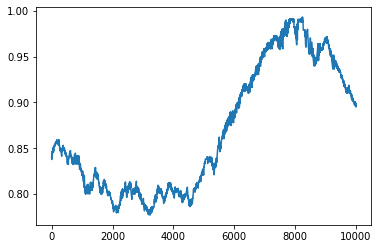

In [198]:
df=pd.read_csv('snapshot_dec_6_spike_kmd.csv')
df.price=df.price.astype(float)
df.timestamp=pd.to_datetime(df['timestamp'])
plt.plot(df.price)
df.head()

3.6235474796651324e-05
0.7511915311281717


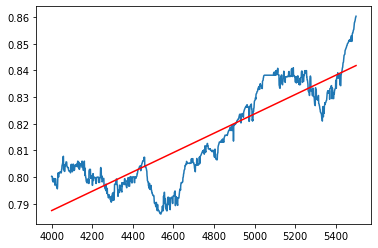

In [329]:
df=pd.read_csv('snapshot_dec_6_spike_kmd.csv')
start=4000
temp_df=df.iloc[(df.index>=start) & (df.index<=start+1500)]
plt.plot(temp_df.price)

x = temp_df.index
y = temp_df.price
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regress_values=x*slope+intercept
plt.plot(x,regress_values,'-r')
print(slope)
print(r_value*r_value)
#so, once slope hits 3.6 buy?

0.00010980435935383196
0.824507897667569


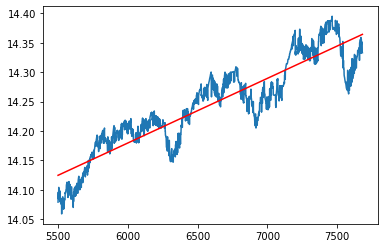

In [327]:
temp_df=df.iloc[(df.index>=5500) & (df.index<=7682)]
plt.plot(temp_df.price)

x = temp_df.index
y = temp_df.price
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regress_values=x*slope+intercept
plt.plot(x,regress_values,'-r')
print(slope)
print(r_value*r_value)

In [223]:
from scipy.stats import linregress
x = temp_df.index
y = temp_df.price
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)

5.8472124261945445e-05


In [570]:
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

In [653]:
#if in a certain amount of time if it raises
#if in a certain amount of time it lowers and stays lower but give it a minute to go up? or to go down?

In [385]:
#function to calculate needed value to sell, etc. for bot
def output_req(buy_price,profit_limit,sell_limit):
    purchase=10
    profit_req=buy_price*profit_limit
    high_req =100/(sell_limit*100)*profit_req
    print(f'sell price if only hits minimum: {profit_req}')
    print(f'will at least need to hit this price to auto sell {high_req}')

In [666]:
def run_demo_machine(file,old_price,sell_limit,profit_limit):
    
#MILLIONAIR BOT
    df=pd.read_csv(file)
    #first_run=True #set this to false if cell is interuppted and I want to continue where left off

    #if (first_run==True):
        #dict1 = {'crypto': 'GALA', 'buy_in': .54,'hold':0,'buy_price':0,'sell_price':0,'new_high':0,'spend':0}
        #dict2 = {'crypto': 'MASK', 'buy_in': 11,'hold':1,'buy_price':11.01,'sell_price':0,'new_high':0,'spend':0}
        #dict3 = {'crypto': 'BTRST', 'buy_in': 5.82,'hold':0,'buy_price':0,'sell_price':0,'new_high':0,'spend':0}

        #currencies=[dict1,dict2,dict3]

    #count=0 #counts and only shows current price certain number of times
    original_spend=10000
    spend=original_spend/4#len(currencies) #how much to invest which adjusts as bot runs
    #profit_limit=1.03 #sets the desired profit before selling
    #sell_limit=.96 #will sell if the high price drops to this percentage (if profit limit is met too)
    high_increase=1.0 #will buy again if price hits the current high multiplied by this
    
    hold=0#default
    buy_price=0 #default
    sell_price=0 #default
    new_high=0 #default
    #spend=original_spend #how much to invest

        #set initiial spends (currently it is divided equal between each but I might adjust later)
        #for currency in currencies:
        #currency['spend']=spend


    #while True:#currently this keeps running until manually exiting
        #time.sleep(10)
        #count=count+1

        #for currency in currencies:
            #type_crypto=currency['crypto']
            #type_exchange=type_crypto+'-USDT'
            #old_price=currency['buy_in'] #when to buy specified crypto
            #buy_price=currency['buy_price']
            #sell_price=currency['sell_price']
            #new_high=currency['new_high']
            #spend=currency['spend']
            #hold=currency['hold']


            #price=float(ticker_update(type_crypto).json()['price'])
            #if (count==30):
            #    print (f'{type_crypto} :${price}')
            #    count=0

    my_time=0
    #print (my_time)
    for i, j in df.iterrows():
        
        
        #SIMULATE TIME
        my_time=my_time+1 #estimating 1500 being about 4 minutes
        
        if (my_time>=200):
            
            x = df.iloc[(df.index>=my_time-200) & (df.index<=my_time)].index
            y =df.iloc[(df.index>=my_time-200) & (df.index<=my_time)].price
            slope, intercept, r_value, p_value, std_err = linregress(x, normalize(y))
            #regress_values=x*slope+intercept

           
        

            if (slope>=.0035 and (r_value*r_value)>.73 and hold==0):
                buy_price=j.price
                new_high=buy_price
                output_req(buy_price,profit_limit,sell_limit)
                print('initial buy')
                print(f'num={i}')
                #print (f'{type_crypto} :${price}')
                print(f'buy price: {buy_price}')
                print(f'buy slope: {slope}')
                print(f'r squared: {r_value*r_value}')


                #print(auth_client.place_market_order(type_exchange, 'buy', funds=floor_balance(spend)))
                #output_req(buy_price,profit_limit,sell_limit)
                hold=1
            if (j.price>new_high):
                #print('hit')
                new_high=j.price
                #print(f'new_high: {new_high}')
            #for eject button below (.9) it should start lower right off the bat and then increase to 1 over time to minimize loss on losing bets
            if (hold==1 and ((j.price<=new_high*sell_limit and j.price>buy_price*profit_limit) or j.price<buy_price*.9)):#makes sure there isn't a loss for the sell
                print(f'buy price: {buy_price} ... sell price: {j.price}')
                sell_price=j.price
                print('sold')
                print(f'num={i}')
                print(f'sell price: {sell_price}')
                print(f'sell slope: {slope}')
                #print(auth_client.place_market_order(type_exchange, 'sell', size=floor_balance(float(get_balance(type_crypto)))))
                hold=2

            #if (hold==2 and j.price>=new_high*high_increase):
             #   spend=math.floor(((sell_price/buy_price)*spend)*.99) #this will need to look at money transfered but for now i'll do this
              #  print(f'original spend: {spend}')
               # buy_price=j.price
                #new_high=buy_price
                #hold=3 
                #print(f'rebuy price: {buy_price}')
                #print(f'num={i}')
                #print(auth_client.place_market_order(type_exchange, 'buy', funds=floor_balance(spend)))

            #if (hold==3 and j.price<=new_high*.99):
             #   sell_price=j.price
              #  print('re-sold')
               # print(f'num={i}')
                #print(f'sell price: {sell_price}')
                #hold=2
            #back_up values before moving to next currency
            #currency['buy_price']=buy_price
            #currency['sell_price']=sell_price
            #currency['new_high']=new_high
            #currency['spend']=spend
            #currency['hold']=hold


    if (hold==1):
        sell_price=j.price #last one is sell if it never matches the sell otherwise
        print(sell_price)
        
    if (hold!=0):
        print(f'initial spend: {spend}')
        print (f'You made ${(sell_price/buy_price)*(spend)-spend}')
        return (sell_price/buy_price)*(spend)-spend
    else:
        print('did not buy or sell')
        return 0



In [667]:
#!!!!!!!!!!!!!.98 seems safest and 1.1 is safest with no eject but with eject maybe 1.2 is better or better yet a safeguard to not buy unless it stays up for a certain amount of time
#bring it down to .96 would increse if I could avoid Mask from buying - perhaps adjust sell limit based on price?
#adjust limit sell based on slope strength
best_total=0
best_sell_limit=0
#best_profite_limit so far is i=98, s=1(1.01) -gives me 617
i=98
s=1

#for i in range(85,100):
print (f'!!!!!!!!!!!!! AT THIS SELL LIMIT PERCENT: {i/100} !!!!!!!!!!!!!!!!!')
#for s in range(0,12):
print (f'!!!!!!!!!!!!! AT THIS PROFIT LIMIT: {1+s/100} !!!!!!!!!!!!!!!!!')
print('----------------------------------------------------')
total=0
total=total+run_demo_machine('dec_2_spike_kmd_shorter.csv',1.2,i/100,1+s/100)
print('')
total=total+run_demo_machine('dec_6_spike_kmd.csv',.86,i/100,1+s/100)
print('')
total=total+run_demo_machine('dec_8_9_spike_MASK.csv',14.1,i/100,1+s/100)#initially lost on this one -- how do I minimize?
print('')
total=total+run_demo_machine('alice_8_9_test.csv',1.2,i/100,1+s/100)
print('')
total=total+run_demo_machine('powr_10_test.csv',.2,i/100,1+s/100)
print('')
print(f'total earnings: ${total}!')
print('')
    #if (total>best_total):
     #   best_total=total
      #  best_sell_limit=i/100
        #best_profit_limit=1+s/100
            

#print('winners:')
#print (best_total=total)
#print (best_sell_limit=i/100)
#print (best_profit_limit=1+s/100)
#$91

#'powr_10_test.csv' (lost on this one)

!!!!!!!!!!!!! AT THIS SELL LIMIT PERCENT: 0.98 !!!!!!!!!!!!!!!!!
!!!!!!!!!!!!! AT THIS PROFIT LIMIT: 1.01 !!!!!!!!!!!!!!!!!
----------------------------------------------------
sell price if only hits minimum: 0.9812150000000001
will at least need to hit this price to auto sell 1.0012397959183674
initial buy
num=859
buy price: 0.9715
buy slope: 0.003545052367277877
r squared: 0.7321000722364648


KeyboardInterrupt: 

In [ ]:
df=pd.read_csv('powr_10_test.csv')
plt.plot(df.price.astype(float))

start=200
temp_df=df.iloc[(df.index>=start-200) & (df.index<=start)]
plt.plot(temp_df.price)

x = temp_df.index
y = temp_df.price
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regress_values=x*slope+intercept
plt.plot(x,regress_values,'-r')
print(slope*10000)
print(r_value*r_value)

0.5
0.9868421052631579


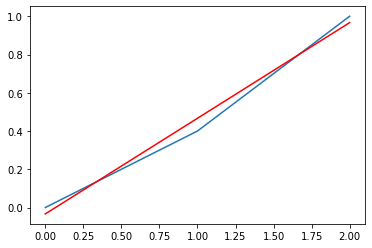

In [608]:
#test out slopes
test_df=pd.DataFrame({'indexx':[0,1,2],'valuess':[1,2,3.5]})




x = test_df.indexx
y = normalize(test_df.valuess)

plt.plot(y)
regress_values=x*slope+intercept
slope, intercept, r_value, p_value, std_err = linregress(x,y)
regress_values=x*slope+intercept
plt.plot(x,regress_values,'-r')
print(slope)
print(r_value*r_value)


In [645]:
h=1
p=2
g=4
k=1
if (h==1) and ((p==2 and g==4) or (k==2)):
    print('yes')

yes


NameError: name 'auth_client' is not defined